## Loading Library

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [ ]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv")
print(df.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   Transaction           Item         date_time period_day weekday_weekend
0            1          Bread  30-10-2016 09:58    morning         weekend
1            2   Scandinavian  30-10-2016 10:05    morning         weekend
2            2   Scandinavian  30-10-2016 10:05    morning         weekend
3            3  Hot chocolate  30-10-2016 10:07    morning         weekend
4            3            Jam  30-10-2016 10:07    morning         weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [ ]:
#2 info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB
None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#3 check missing values
print(df.isnull().sum())

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4. The overview reveals a total amount of missing value. (fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-77bb5c9887f2>:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')  # Use 'coerce' to handle any invalid dates


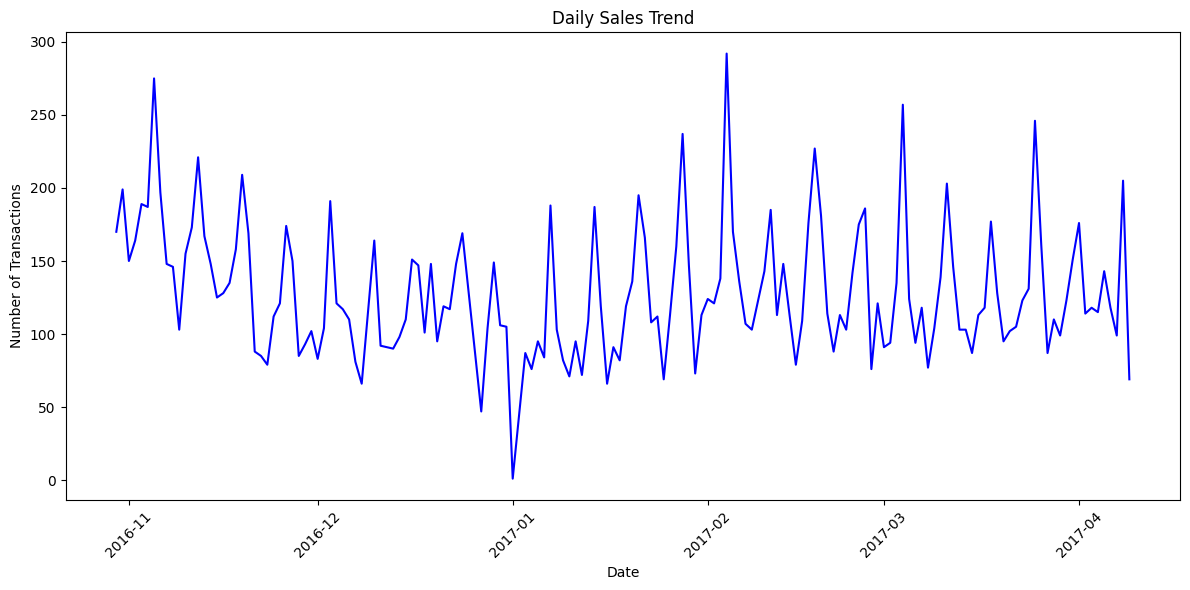

In [ ]:
# Ensure 'date_time' is in datetime format
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')  # Use 'coerce' to handle any invalid dates

# Create the 'date' column from 'date_time'
df['date'] = df['date_time'].dt.date

# Aggregate data: Count transactions per day
daily_sales = df.groupby('date').size()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Transactions', linestyle='-', marker='', color='blue')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Sales Trend')

# Format the x-axis for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [ ]:
# 6
df['day'] = pd.to_datetime(df['date_time']).dt.day
df['month'] = pd.to_datetime(df['date_time']).dt.month
df['year'] = pd.to_datetime(df['date_time']).dt.year
df['time'] = pd.to_datetime(df['date_time']).dt.time
df['hour'] = pd.to_datetime(df['date_time']).dt.hour
df['day_name'] = pd.to_datetime(df['date_time']).dt.day_name()

df.drop('date', axis=1, inplace=True)

df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,hour,day,month,year,time,day_name
3837,1863,Bread,2016-11-22 12:35:00,afternoon,weekday,12,22,11,2016,12:35:00,Tuesday
857,425,Farm House,2016-11-03 16:42:00,afternoon,weekday,16,3,11,2016,16:42:00,Thursday
10799,5401,Farm House,2017-01-27 10:33:00,morning,weekday,10,27,1,2017,10:33:00,Friday
5085,2532,Coffee,2016-12-03 12:50:00,afternoon,weekend,12,3,12,2016,12:50:00,Saturday
2251,1099,Tea,2016-11-11 17:11:00,evening,weekday,17,11,11,2016,17:11:00,Friday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


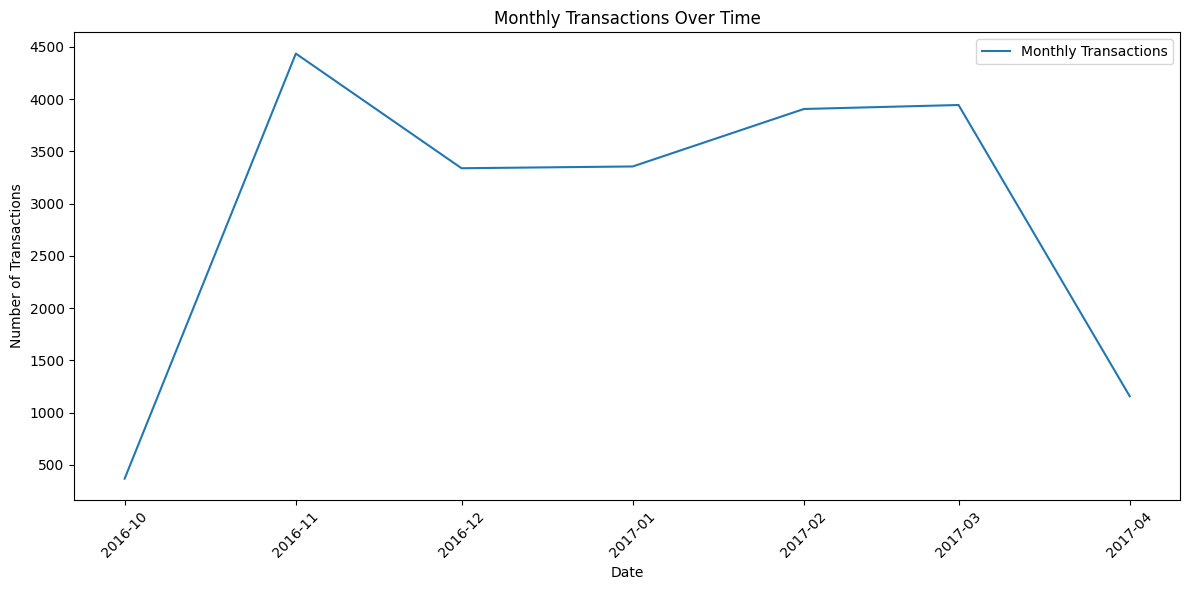

In [ ]:
# 7
df['date'] = pd.to_datetime(df['date_time'])

monthly_transactions = df.groupby(['year', 'month']).size()

monthly_transactions = monthly_transactions.reset_index(name='Transaction Count')

monthly_transactions['date'] = pd.to_datetime(
    monthly_transactions[['year', 'month']].assign(Day=1)
)

plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions['date'], monthly_transactions['Transaction Count'], label='Monthly Transactions')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Monthly Transactions Over Time')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

8. Now, the visualization above provides better insights:  it clearly shows how transaction volumes change over time, highlighting trends such as consistent growth, seasonal spikes, or significant dips during specific months or years. This enables easier identification of patterns, like peak business months or periods of decline, which can guide decision-making and strategy development.






. (fill that blank on the section below)

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [ ]:
#9
weekday_names = df.loc[df['weekday_weekend'] == 'weekday', 'day_name'].unique()

# Extract unique weekend names
weekend_names = df.loc[df['weekday_weekend'] == 'weekend', 'day_name'].unique()

print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [ ]:
#10
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month
df['day_name'] = df['date_time'].dt.day_name()

# Group and aggregate data
grouped = df.groupby(['month', 'day_name']).size().reset_index(name='total_transactions')

# Create the pivot table
pivot_table = grouped.pivot_table(index='month', columns='day_name', values='total_transactions', fill_value=0)

# Rearrange columns to follow the desired day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table.reindex(columns=day_order)
pivot_table = pivot_table.astype(int)
# Display the result
pivot_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is The table reveals several key insights, such as consistent peaks in Row 11, indicating a period of strong performance, while Row 4 shows the lowest values, suggesting a notable dip. Row 10 contains many zeros, which could represent missing data or a period of inactivity. Column 6 consistently outperforms other columns, indicating a high-performing segment or category that could serve as a model for improvement in others. Overall, the data suggests seasonal or temporal trends, with fluctuations in Rows 1–3 and 11–12 highlighting potential peak periods. These patterns can guide strategic planning, resource allocation, and performance improvement initiatives.


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


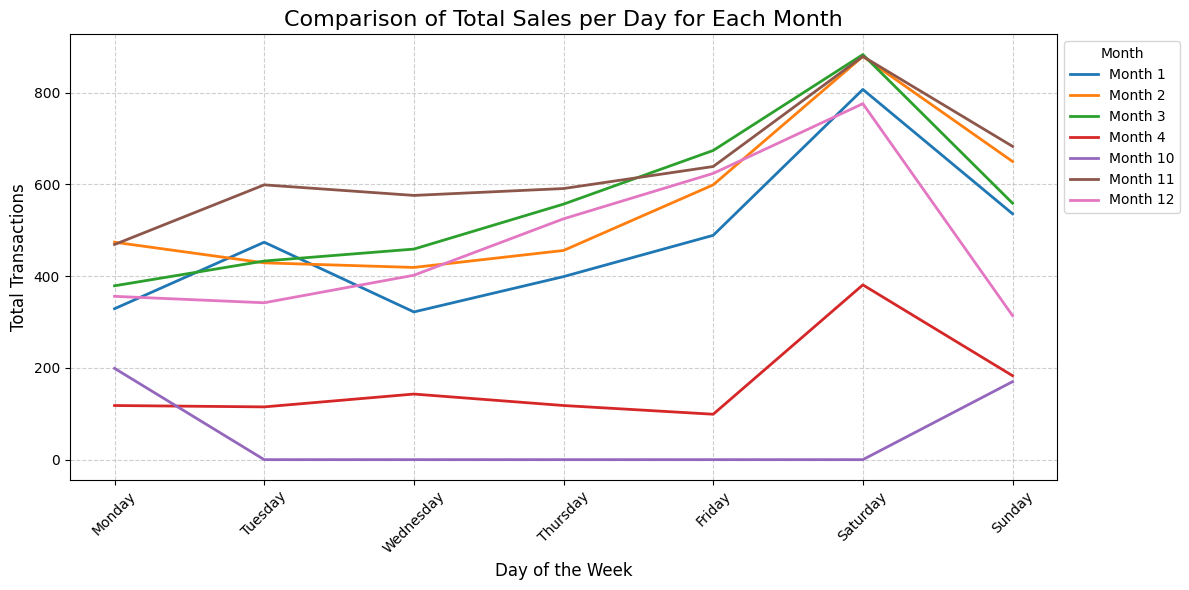

In [ ]:
pivot_table_t = pivot_table.T

plt.figure(figsize=(12, 6))

for month in pivot_table_t.columns:
    plt.plot(pivot_table_t.index, pivot_table_t[month], label=f'Month {month}', linewidth=2, markersize=6)

plt.title('Comparison of Total Sales per Day for Each Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that show how total sales fluctuate across different days of the week for each month, highlighting patterns such as specific days with higher sales volume or seasonal variations in transaction frequency..

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [ ]:
# 14
unique_periods = df['period_day'].unique()
print(unique_periods)

['morning' 'afternoon' 'evening' 'night']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [ ]:
# 15
morning_hours = df[df['period_day'] == 'morning']['hour'].unique()
afternoon_hours = df[df['period_day'] == 'afternoon']['hour'].unique()
evening_hours = df[df['period_day'] == 'evening']['hour'].unique()
night_hours = df[df['period_day'] == 'night']['hour'].unique()

print("Morning Hours:", morning_hours)
print("Afternoon Hours:", afternoon_hours)
print("Evening Hours:", evening_hours)
print("Night Hours:", night_hours)


Morning Hours: [ 9 10 11  8  7]
Afternoon Hours: [12 13 14 15 17 16]
Evening Hours: [18 19 20]
Night Hours: [21  1 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

> The oddity in the results lies in the misclassification of hours within certain periods of the day. For instance, the **morning period** includes hours such as 7 and 8 AM, which is typically expected to start at 6 AM and end around 12 PM. While this isn't inherently incorrect, it raises a potential issue with how the time intervals are being grouped. Similarly, the **night period** includes hours like 1, 23, and 22, which seem out of place. Normally, "night" would cover hours from 9 PM to 6 AM, but the presence of 1 AM and 23 PM suggests some overlap or inconsistency in how the periods were defined, leading to a misalignment in the expected time ranges.

This misclassification could indicate that the time periods need to be redefined or adjusted, ensuring that each period is consistent with typical conventions or specific business rules. The current grouping logic may not be accurately reflecting how time periods should be segmented, and further fine-tuning could be required for a more precise categorization of the hours into morning, afternoon, evening, and night.




But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


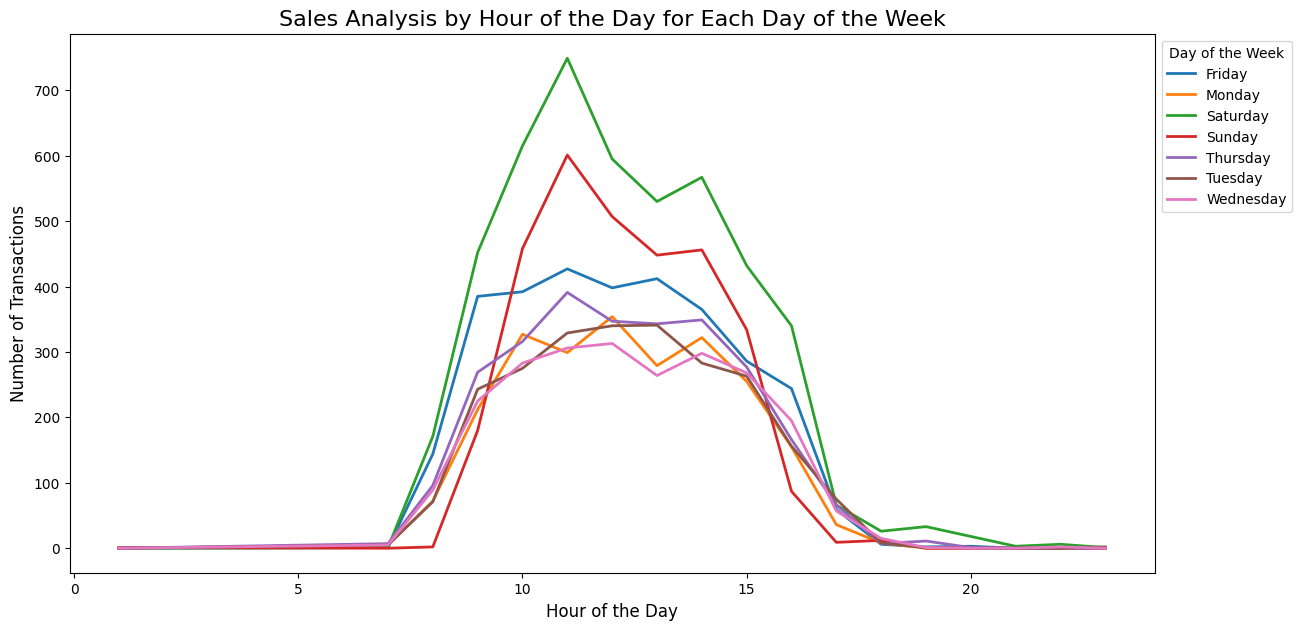

In [ ]:
# 17
# Aggregate the total number of transactions by hour for each day of the week
sales_by_hour = df.groupby(['hour', 'day_name']).size().unstack(fill_value=0)

# Plot the line chart for each day
plt.figure(figsize=(14, 7))

for day in sales_by_hour.columns:
    plt.plot(sales_by_hour.index, sales_by_hour[day], label=day, linewidth=2, markersize=6)

# Add title and labels
plt.title('Sales Analysis by Hour of the Day for Each Day of the Week', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Add grid for better readabilit

# Add a legend for the days of the week
plt.legend(title='Day of the Week', loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout to ensure everything fits


# Show the plot
plt.show()


18. The daily sales trend plot reveals that _______

Morning Peak for Some Days

Afternoon Increase

Evening Drop or Stability

Nighttime Activity

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


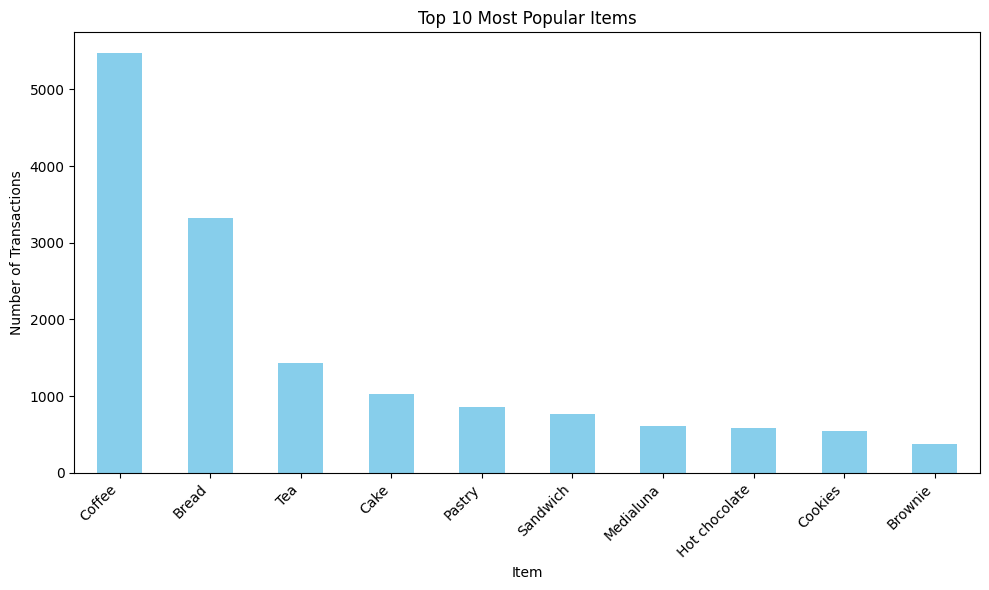

In [ ]:
# 19
item_counts = df.groupby('Item').size().sort_values(ascending=False)

# Get top 10 most popular items
top_items = item_counts.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Item')
plt.ylabel('Number of Transactions')
plt.title('Top 10 Most Popular Items')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


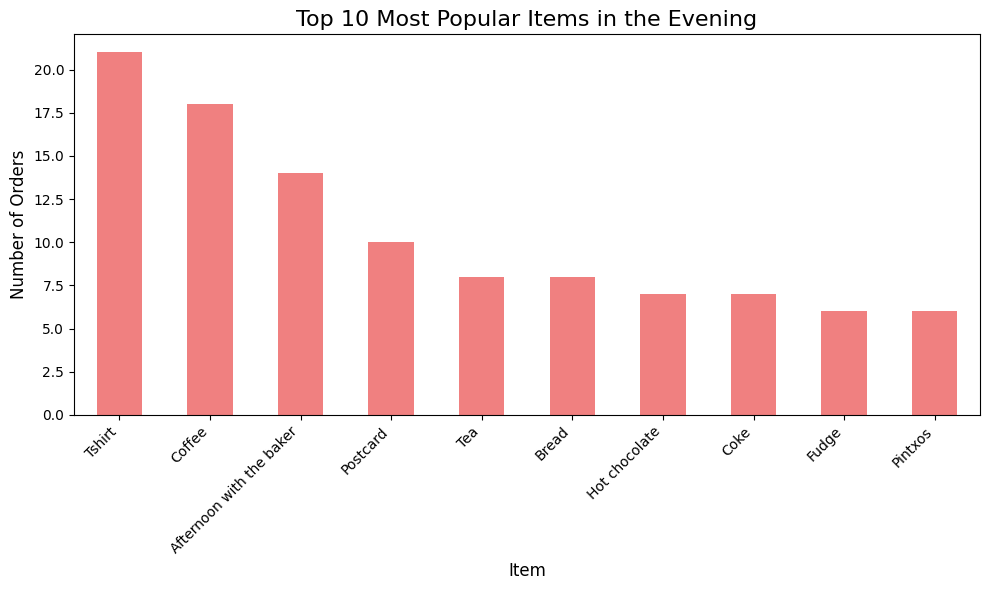

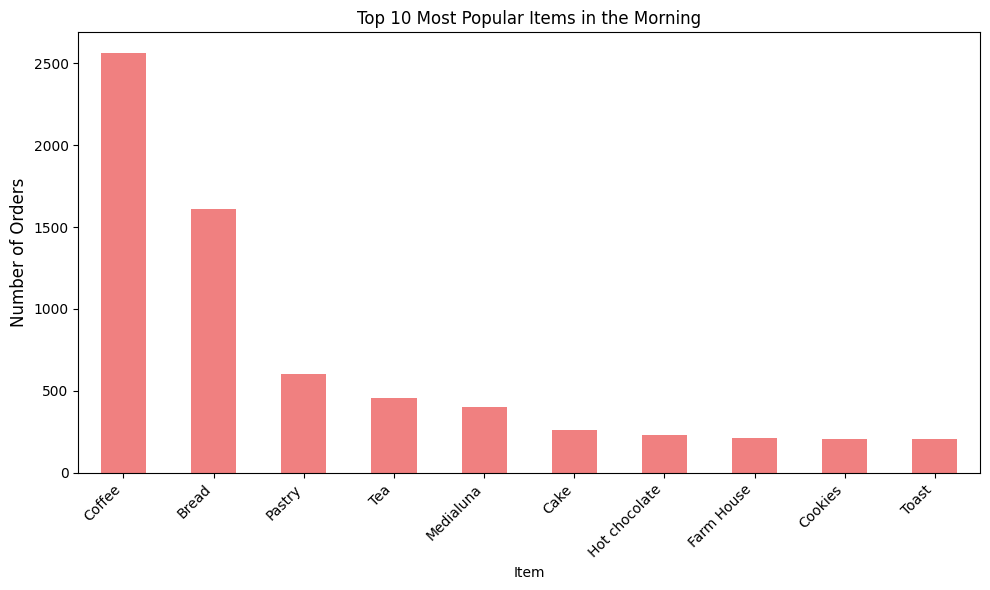

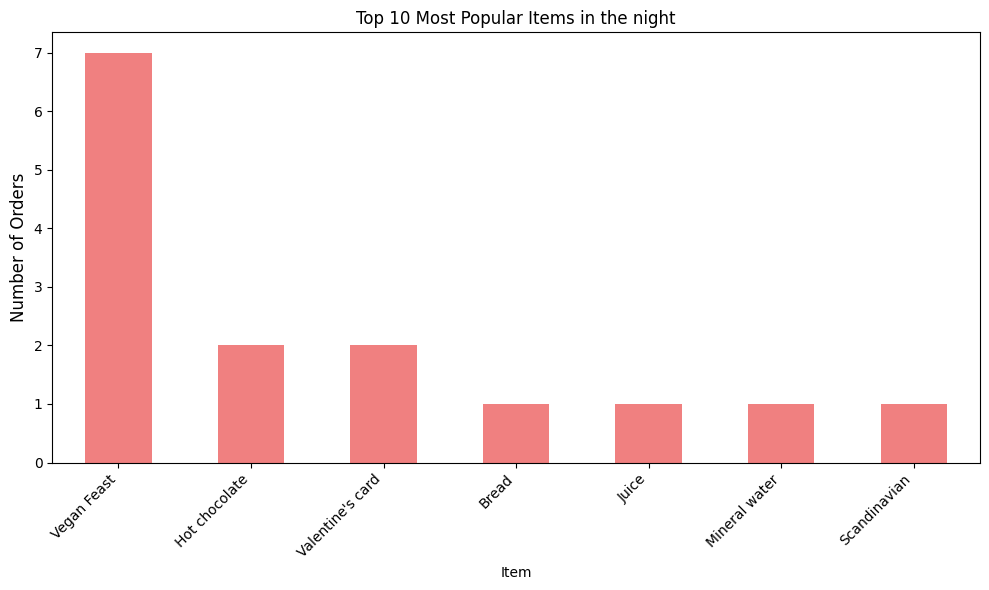

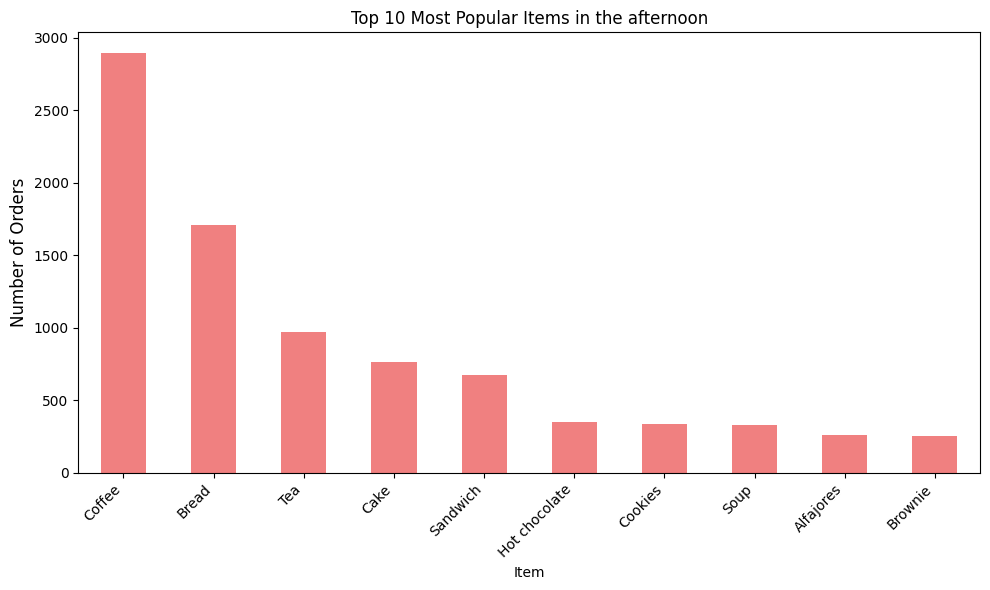

In [ ]:
evening_sales = df[df['period_day'] == 'evening']

# Count the frequency of orders for each item in the evening
evening_item_counts = evening_sales['Item'].value_counts()

# Get the top 10 most popular items in the evening
top_10_evening_items = evening_item_counts.head(10)

# Plot the bar chart for top 10 items in the evening
plt.figure(figsize=(10, 6))
top_10_evening_items.plot(kind='bar', color='lightcoral')

# Add title and labels
plt.title('Top 10 Most Popular Items in the Evening', fontsize=16)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

morning_sales = df[df['period_day'] == 'morning']

# Count the frequency of orders for each item in the evening
morning_item_counts = morning_sales['Item'].value_counts()

# Get the top 10 most popular items in the evening
top_10_morning_item = morning_item_counts.head(10)

# Plot the bar chart for top 10 items in the evening
plt.figure(figsize=(10, 6))
top_10_morning_item.plot(kind='bar', color='lightcoral')

# Add title and labels
plt.title('Top 10 Most Popular Items in the Morning')
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

night_sales = df[df['period_day'] == 'night']

# Count the frequency of orders for each item in the evening
night_item_counts = night_sales['Item'].value_counts()

# Get the top 10 most popular items in the evening
top_10_night_item = night_item_counts.head(10)

# Plot the bar chart for top 10 items in the evening
plt.figure(figsize=(10, 6))
top_10_night_item.plot(kind='bar', color='lightcoral')

# Add title and labels
plt.title('Top 10 Most Popular Items in the night')
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


afternoon_sales = df[df['period_day'] == 'afternoon']

# Count the frequency of orders for each item in the evening
afternoon_item_counts = afternoon_sales['Item'].value_counts()

# Get the top 10 most popular items in the evening
top_10_afternoon_item = afternoon_item_counts.head(10)

# Plot the bar chart for top 10 items in the evening
plt.figure(figsize=(10, 6))
top_10_afternoon_item.plot(kind='bar', color='lightcoral')

# Add title and labels
plt.title('Top 10 Most Popular Items in the afternoon')
plt.ylabel('Number of Orders', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

21. It turns out that there is something different in the plot above, the insight is ____

The most frequently purchased item is coffee, and store transactions are higher in the morning and afternoon, while significantly lower at night.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-31-6b9a075d9c51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date


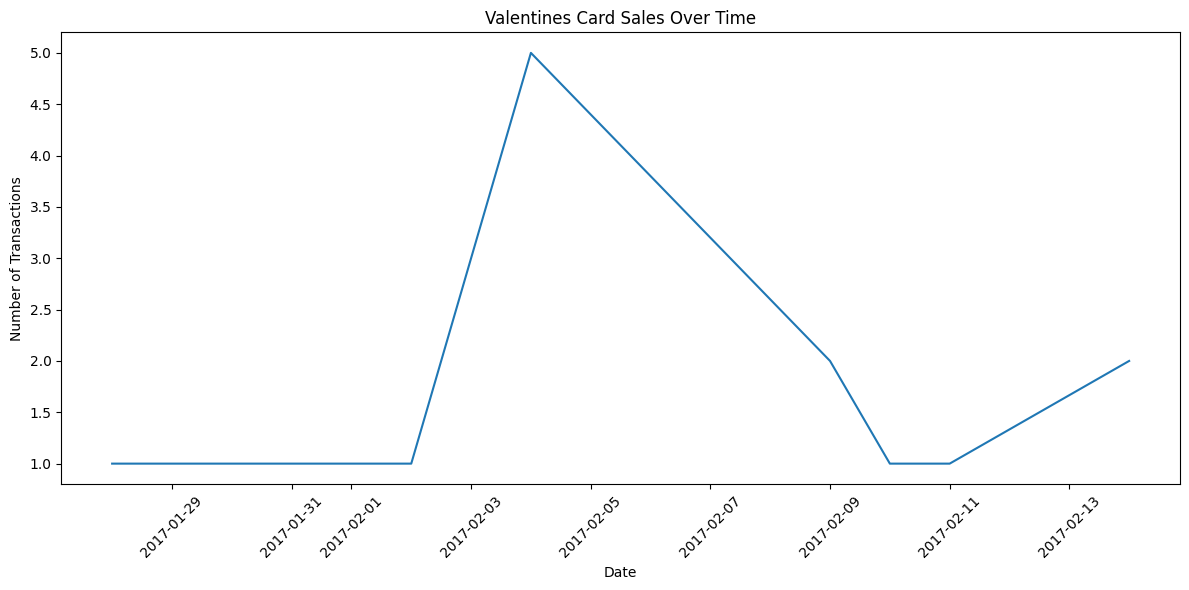

In [ ]:
#22
valentine_sales = df[df['Item'].str.contains('Valentine', case=False, na=False)]

valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date
sales_by_date = valentine_sales.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, linestyle='-', label='Valentine Card Sales')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Valentines Card Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


23. I found the insight from the sale of the Valentine's cards above is ____

Valentine card transactions peak as Valentine's Day at February 14th


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [ ]:
# 24
apriori_df = pd.crosstab(df['Transaction'], df['Item'])
apriori_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#25

# Convert quantities to 1 and 0
basket_encoded = apriori_df.applymap(lambda x: 1 if x > 0 else 0)
basket_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-96665e0bc591>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_df.applymap(lambda x: 1 if x > 0 else 0)


Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [ ]:
# 26
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Create a DataFrame with 'support' and 'itemsets' columns
frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

# Display the DataFrame
display(frequent_itemsets_df)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [ ]:
# 27
# Apply Apriori algorithm
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
rules.sample(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
19,(Coffee),(Toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699,0.615122
4,(Cake),(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865,0.420538
3,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
14,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
7,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174,0.081700
0,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
11,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919,0.108738
17,(Coffee),(Sandwich),0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321
9,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048
1,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



As my day of analysis comes to a close, I have compiled several key findings derived from The Bread Basket dataset. The most frequently purchased item is coffee, which shows strong demand, particularly in the morning and afternoon. Transaction volumes are highest during these daytime hours, with a noticeable dip during the night. This indicates that the store experiences greater traffic during the day, suggesting that operations could be optimized for peak daytime hours. Additionally, sales of Valentine cards spike as **February 14th** approaches, highlighting the seasonal nature of certain products and the need for preparation in advance of special events.

Sales trends by hour reveal clear patterns, with transactions peaking in the morning (6 AM - 12 PM) and afternoon (12 PM - 6 PM), while significantly declining during the night (9 PM - 6 AM). Understanding these trends can aid in improving staffing, marketing efforts, and inventory management. The analysis also shows distinct customer preferences that vary by time of day and season, providing valuable insights to tailor marketing campaigns and optimize store operations during high-demand periods. These findings allow the store to make data-driven decisions to enhance both customer experience and operational efficiency.